In [4]:
# Full code 
#load libraries
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import pickle
# Emotions in the RAVDESS dataset
emotions={
  '01':'calm',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to TRAIN
observed_emotions=['calm', 'happy', 'fearful', 'sad','angry']
# Function  for extract feature
def extract_feature(file_name, mfcc, chroma, mel):
        X,sample_rate=librosa.load(os.path.join(file_name),res_type='kaiser_fast')
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result
# Function  for Load data 
def load_data(datapath):
    x,y=[],[]
    for file in glob.glob(datapath):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return x,y
# Function for train model
def train_model_MLPClassifier(x_train,y_train):
    #Initialize the Multi Layer Perceptron Classifier
    mainmodel=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,),       learning_rate='adaptive', max_iter=500)
    #Train the model
    mainmodel.fit(x_train,y_train)
    # save the model to disk
    filename = 'SER_modelnew.sav'
    pickle.dump(mainmodel, open(filename, 'wb'))
    return mainmodel

# Function for test the audio files
def test_audio_files(testfilepath):
    #extracting the feature from the test audio file
    testfile=extract_feature(testfilepath, mfcc=True, chroma=True, mel=True)
    # load the model from disk
    modeltest = pickle.load(open('SER_modelnew.sav', 'rb'))
    #checking features in test audio file
    print("Total of features:", testfile.shape[0])
    #convert one dimensional data into two dimensions data 
    testfile=np.expand_dims(testfile, axis=0)
    #predict the Emotion in test audio file 
    test_pred=modeltest.predict(testfile)
    return test_pred[0]

# Dataset path
datapath="C:\\Users\\Eliza\\Documents\\PYTHON EBIN\\AI assi\\Ai Assignment\\SER\\dataset\\Actor_*\\*.wav"
#Load dataset
x,y=load_data(datapath)
#Splitting the data for training and testing 
x_train,x_test,y_train,y_test=train_test_split(np.array(x), y, test_size=0.2, random_state=9)
print("Total training samples:", x_train.shape[0])
print("Total testing samples:", x_test.shape[0])
print("Total of features:", x_train.shape[1])
#Train new model and save the model 
main=train_model_MLPClassifier(x_train,y_train)
# load the model from disk
model = pickle.load(open('SER_modelnew.sav', 'rb'))
#predict the data 
y_pred=model.predict(x_test)
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))



Total training samples: 844
Total testing samples: 212
Total of features: 180
Accuracy: 65.57%


*************confusion_matrix*****************
 [[18  7  2  7  0]
 [ 0 55  0  0  0]
 [ 0 12 20  8  0]
 [ 2 13  1 29  0]
 [ 0 30  1  4  3]] 
*************confusion_matrix*****************

*************classification_report*****************
               precision    recall  f1-score   support

       angry       0.90      0.53      0.67        34
        calm       0.47      1.00      0.64        55
     fearful       0.83      0.50      0.62        40
       happy       0.60      0.64      0.62        45
         sad       1.00      0.08      0.15        38

    accuracy                           0.59       212
   macro avg       0.76      0.55      0.54       212
weighted avg       0.73      0.59      0.55       212
 
*************classification_report*****************



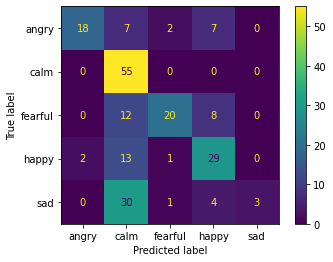

In [3]:
print("*************confusion_matrix*****************\n",confusion_matrix(y_test,y_pred),"\n*************confusion_matrix*****************\n")
plot_confusion_matrix(model,x_test,y_test)
print("*************classification_report*****************\n",classification_report(y_test,y_pred),"\n*************classification_report*****************\n")


In [7]:
# Checking Emotion in the audio test files
testpath="C:\\Users\\Eliza\\Documents\\PYTHON EBIN\\AI assi\\Ai Assignment\\SER\\test\\"
testfilepath= testpath+"3A.wav"
print("File Path : \n",testfilepath)
S_Emotion= test_audio_files(testfilepath)
print("\nEmotion  = ",S_Emotion,"\n")

File Path : 
 C:\Users\Eliza\Documents\PYTHON EBIN\AI assi\Ai Assignment\SER\test\taunt.wav
Total of features: 180

Emotion  =  angry 



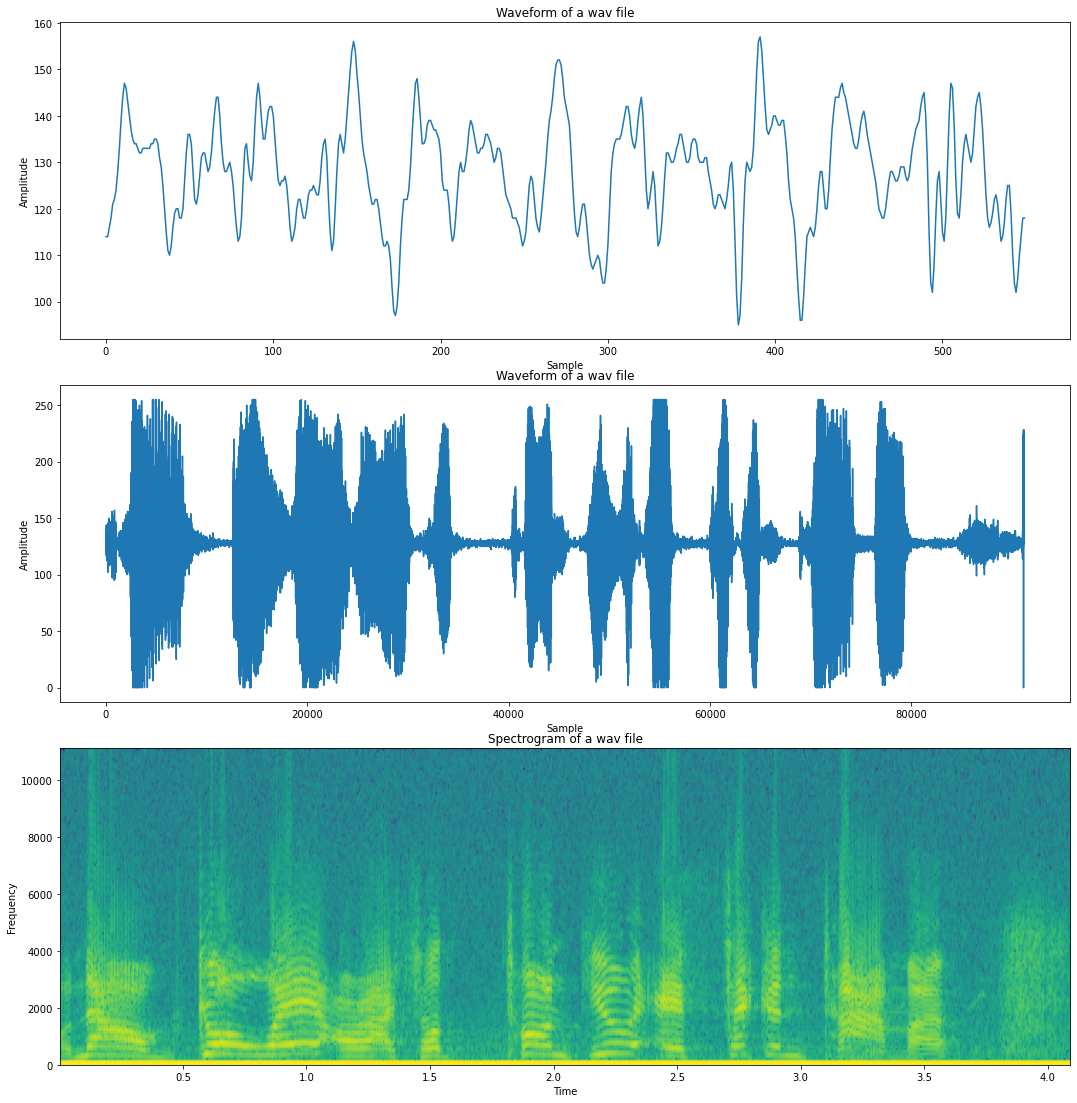

In [8]:
#import the pyplot and wavfile modules 
import matplotlib.pyplot as plot
from scipy.io import wavfile
# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read(testfilepath)
# Plot the signal read from wav file
Waveform=plot.figure(figsize=(15, 15))
plot.subplot(311)
plot.title('Waveform of a wav file')
plot.plot(signalData[450:1000])
plot.xlabel('Sample')
plot.ylabel('Amplitude')
# Plot the signal read from wav file
plot.subplot(312)
plot.tight_layout()
plot.title('\nWaveform of a wav file')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')
plot.subplot(313)
if signalData.ndim==1:
    plot.specgram(signalData,Fs=samplingFrequency)
elif signalData.ndim==2:
    plot.specgram(signalData[:,0],Fs=samplingFrequency)
plot.title('Spectrogram of a wav file')
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()
Waveform.savefig("Waveform.png")

In [9]:


signalData.ndim

1

In [15]:
# load model and testing 
#load libraries
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import pickle
# Function for test the audio files
def test_audio_files(testfilepath):
    #extracting the feature from the test audio file
    testfile=extract_feature(testfilepath, mfcc=True, chroma=True, mel=True)
    # load the model from disk
    modeltest = pickle.load(open('SER_modelnew.sav', 'rb'))
    #checking features in test audio file
    print("Total of features:", testfile.shape[0])
    #convert one dimensional data into two dimensions data 
    testfile=np.expand_dims(testfile, axis=0)
    #predict the Emotion in test audio file 
    test_pred=modeltest.predict(testfile)
    return test_pred[0]
# Checking Emotion in the audio test files
testpath="C:\\Users\\Eliza\\Documents\\PYTHON EBIN\\AI assi\\Ai Assignment\\SER\\test\\"
testfilepath= testpath+"2F.wav"
print("File Path : \n",testfilepath)
S_Emotion= test_audio_files(testfilepath)
print("\nEmotion  = ",S_Emotion,"\n")

File Path : 
 C:\Users\Eliza\Documents\PYTHON EBIN\AI assi\Ai Assignment\SER\test\2F.wav
Total of features: 180

Emotion  =  fearful 

